<h1 style='text-align: center;'>Wine Quality Data Set</h1>
<br><p style='text-align: center;'><b>Data set come from: https://archive.ics.uci.edu/ml/datasets/wine+quality</b></p> 
<h3>There are 3 neural networks models:
    <ol>
        <li>predicting if wine is red or white</li>
        <li>predicting wine quality (regression problem)</li>
        <li>predicting wine quality (classification problem)</li>
    </ol>
</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

<h2>Data overview</h2>

In [3]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h2>Data visualization</h2>

<b>Alcohol content depending on wine color:</b>

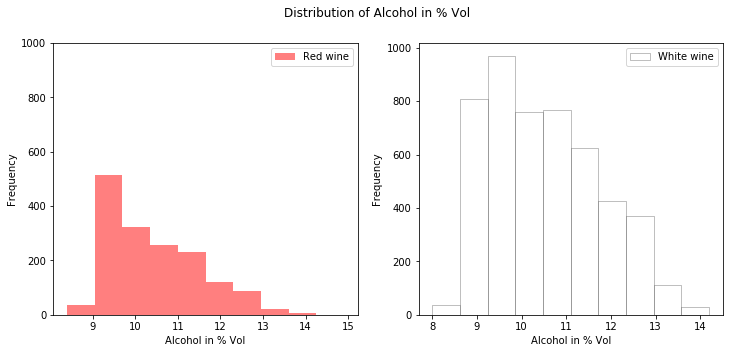

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))


ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol");

<b>Wine quality vs amount of sulphates:</b>

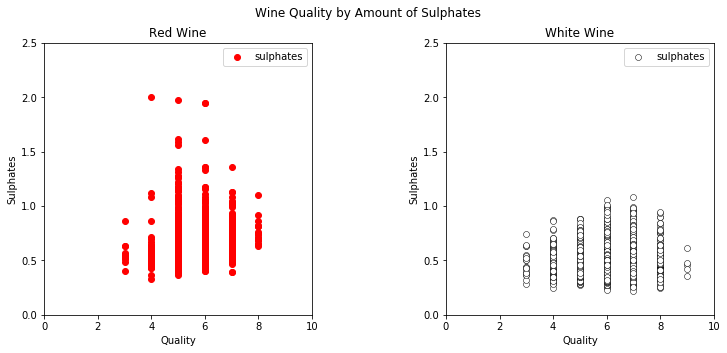

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates");

<h3>New feature - wine type (red or white)</h3>

In [3]:
# adding labels to wines (red - 1, white - 0)
red['type'] = 1
white['type'] = 0

# append white wines to red ones
wines = red.append(white, ignore_index=True)

In [4]:
wines.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

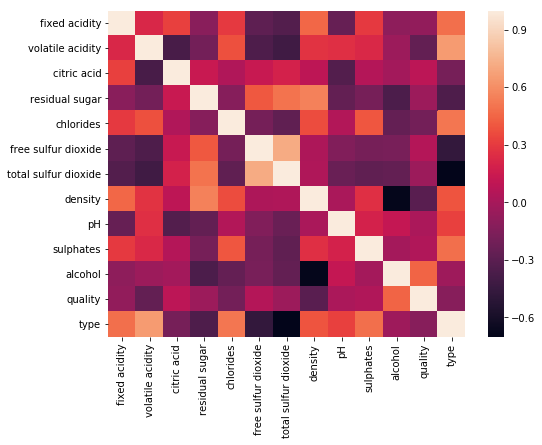

In [49]:
# correlations between features
corr = wines.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values);

# we can see high correlation between 'density' and 'residual sugar' as well as between 'type' and 'volatile acidity'

<br><h1 style='text-align: center;'>Predicting WINE TYPE (0 - white or 1 - red)</h1>

<h2>Train test split</h2>

In [5]:
from sklearn.model_selection import train_test_split

In [65]:
X = wines.drop('type', axis=1)
y = wines['type']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Data standarization</h2>

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<h2>Model</h2>

In [70]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(12,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
]);

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']);

In [73]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)
print("Model accuracy: ", score[1])

Epoch 1/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.1097 - acc: 0.9530
Epoch 2/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0307 - acc: 0.9931
Epoch 3/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0256 - acc: 0.9942
Epoch 4/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0218 - acc: 0.9942
Epoch 5/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0200 - acc: 0.9960
Epoch 6/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0173 - acc: 0.9963
Epoch 7/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0157 - acc: 0.9969
Epoch 8/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0144 - acc: 0.9975
Epoch 9/10
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0128 - acc: 0.9971
Epoch 10/10
1300/1300 [==============================] - 0s 62us/sample - loss: 0.0352 - acc: 0.9938
Model ac

In [74]:
predictions = model.predict_classes(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[959   0]
 [  8 333]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       959
           1       1.00      0.98      0.99       341

   micro avg       0.99      0.99      0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



<h3>Despite fears that accuracy score may not reflect the actual effectiveness of the model, because data were not evenly distributed (24,6% - 75,4% for white wines), confusion matrix shows that the model works perfectly and has classified correctly almost all examples.</h3>

<br><h1 style='text-align: center;'>Predicting WINE QUALITY (as regression problem)</h1>

In [85]:
# data split
X = wines.drop('quality', axis=1)
y = wines['quality']

In [86]:
# data standarization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [103]:
# model - I use here k-fold validation
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

for train, test in kfold.split(X, y):
    model2 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_dim=12),
        keras.layers.Dense(1)
    ])
    
    model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    model2.fit(X[train], y[train], epochs=10, verbose=0)
    
    mse_value, mae_value = model2.evaluate(X[test], y[test], verbose=0)
    print('MSE: ', round(mse_value, 3))
    print('MAE: ', round(mae_value, 3), '\n')

MSE:  0.499
MAE:  0.54 

MSE:  0.513
MAE:  0.55 

MSE:  0.478
MAE:  0.548 



<h3>Model works not bad. It is wrong by about 0.5 so there is a risk of classifying a given wine at most to neighboring classes.</h3>

<br><h1 style='text-align: center;'>Predicting WINE QUALITY (as classification problem)</h1>

In [130]:
# low number of data and their completeness (no samples for classes 1, 2 and 10) can hinder building a well performing model
wines.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [104]:
# data split
X = wines.drop('quality', axis=1)
y = wines['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [105]:
# data standarization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [127]:
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=12),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]);

In [128]:
model3.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

score = model3.evaluate(X_test, y_test, verbose=1)
print("Model accuracy: ", score[1])

Epoch 1/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 1.1441 - acc: 0.5243
Epoch 2/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 1.0579 - acc: 0.5505
Epoch 3/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 1.0397 - acc: 0.5578
Epoch 4/10
5197/5197 [==============================] - 14s 3ms/sample - loss: 1.0233 - acc: 0.5594
Epoch 5/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 1.0097 - acc: 0.5669
Epoch 6/10
5197/5197 [==============================] - 11s 2ms/sample - loss: 1.0042 - acc: 0.5674
Epoch 7/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 0.9930 - acc: 0.5738
Epoch 8/10
5197/5197 [==============================] - 11s 2ms/sample - loss: 0.9903 - acc: 0.5763
Epoch 9/10
5197/5197 [==============================] - 12s 2ms/sample - loss: 0.9825 - acc: 0.5734
Epoch 10/10
1300/1300 [==============================] - 0s 319us/sample - loss: 1.0389 - acc: 0.561

In [129]:
predictions = model3.predict_classes(X_test)

print(classification_report(y_test, predictions));

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.25      0.02      0.04        41
           5       0.61      0.64      0.62       431
           6       0.56      0.65      0.60       572
           7       0.47      0.40      0.43       211
           8       0.00      0.00      0.00        37
           9       0.00      0.00      0.00         2

   micro avg       0.56      0.56      0.56      1300
   macro avg       0.27      0.24      0.24      1300
weighted avg       0.53      0.56      0.54      1300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3>The model achieves 56% accuracy, which is quite a poor result, however, given the limited amount of training data, a much better result cannot be expected.</h3>